In [29]:
from netCDF4 import Dataset
import netCDF4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from datetime import datetime, timezone
import nc_time_axis

atmos_epoch = datetime(1900, 1, 1, 0, 0, tzinfo=timezone.utc)

In [30]:
observational_geopotential = Dataset('../data/geopotential_height_500hPa_era5_6hourly_z0001_daymean_2019_beginAdjust.nc', mode='r')

observational_labels = Dataset('../data/labels/GTD_1979-2019_JJAextd_8.nc', mode='r')

In [31]:
long = observational_geopotential.variables['longitude']
lat = observational_geopotential.variables['latitude']
zg = observational_geopotential.variables['z_0001']
time_raw = observational_geopotential.variables["time"]
time = netCDF4.num2date(time_raw[:], time_raw.units, time_raw.calendar)

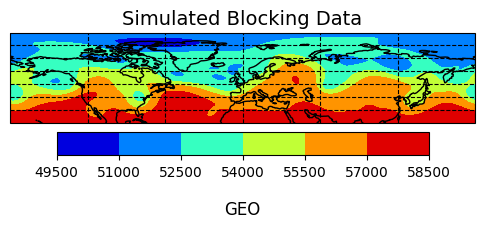

In [32]:
# plot observational data onto worldmap

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

plt.contourf(long[:], lat[:], zg[0], transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Simulated Blocking Data', size=14)
cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('GEO',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

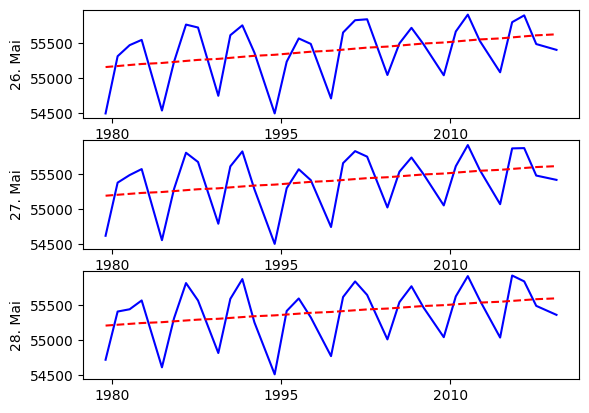

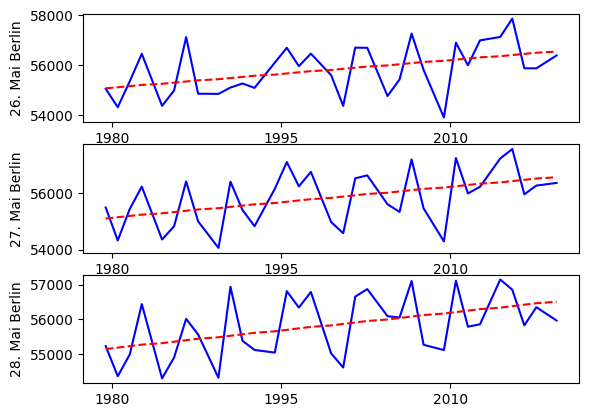

In [66]:
num = 3
for i in range(num):
    y = np.mean(zg[i::123], axis=(1, 2))
    tmp_time = time[i::123]
    x = np.arange(len(y))
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef) 

    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time[i].day) + ". Mai")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
    # text = "trend-coef: " + "%.2f" % coef[0]
    # plt.text(1, 1, text)
plt.show()

num = 3
for i in range(num):
    y = zg[i::123, 150, 774]
    tmp_time = time[i::123]
    x = np.arange(len(y))
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef) 

    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time[i].day) + ". Mai Berlin")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
    # text = "trend-coef: " + "%.2f" % coef[0]
    # plt.text(1, 1, text)
plt.show()

In [37]:
mean_mask = np.array(np.zeros((98, len(lat), len(long))))
zg_mean = np.array(np.zeros((len(time), len(lat), len(long))))

years = int(len(time) / 98) # number of days per year

for j in range(2):
    offset = 98 * j
    for i in range(98):
        mean_mask[i] = np.mean([zg[offset + i], zg[offset + 98 + i], zg[offset + 98 * 2 + i], zg[offset + 98 * 3 + i], zg[offset + 98 * 4 + i]])
        zg_mean[offset + i] = np.subtract(zg[offset + i], mean_mask[i])

for j in range(2, years-2):
    offset = 98 * j
    for i in range(98):
        mean_mask[i] = np.mean([zg[offset + i], zg[offset - 98 + i], zg[offset - 98 * 2 + i], zg[offset + 98 + i], zg[offset + 98 * 2 + i]])
        zg_mean[offset + i] = np.subtract(zg[offset + i], mean_mask[i])

for j in range(years-2, years):
    offset = 98 * j
    for i in range(98):
        if (offset + i >= len(time)): break
        mean_mask[i] = np.mean([zg[offset + i], zg[offset - 98 + i], zg[offset - 98 * 2 + i], zg[offset - 98 * 3 + i], zg[offset - 98 * 4 + i]])
        zg_mean[offset + i] = np.subtract(zg[offset + i], mean_mask[i])


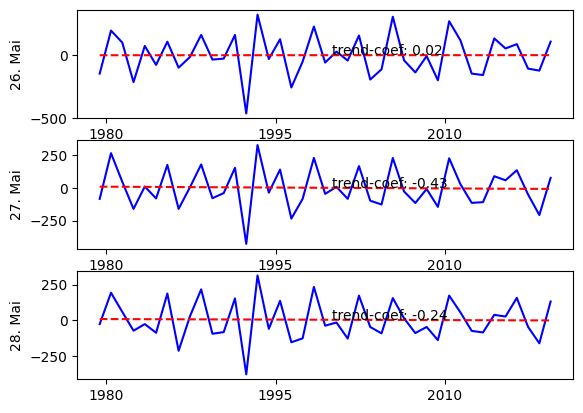

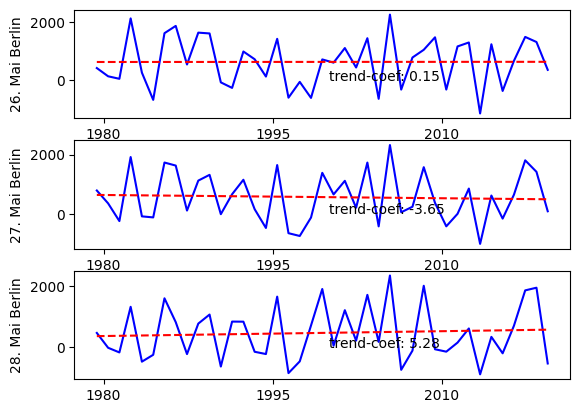

: 

In [72]:
num = 3
for i in range(num):
    y = np.mean(zg_mean[i::98], axis=(1, 2))
    tmp_time = time[i::98]
    x = np.arange(len(y))
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef) 

    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time[i].day) + ". Mai")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
    text = "trend-coef: " + "%.2f" % coef[0]
    plt.text(1, 1, text)
plt.show()

num = 3
for i in range(num):
    y = zg_mean[i::98, 150, 774]
    tmp_time = time[i::98]
    x = np.arange(len(y))
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef) 

    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time[i].day) + ". Mai Berlin")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
    text = "trend-coef: " + "%.2f" % coef[0]
    plt.text(1, 1, text)
plt.show()

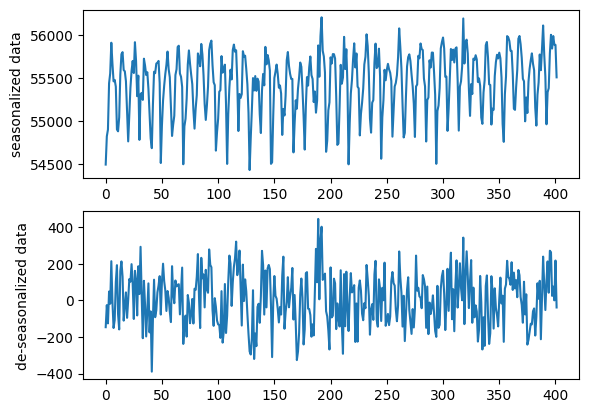

In [68]:
plt.subplot(2, 1, 1)
plt.ylabel("seasonalized data")
plt.plot(np.mean(zg[::10], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.ylabel("de-seasonalized data")
plt.plot(np.mean(zg_mean[::10], axis=(1, 2)))
plt.show()

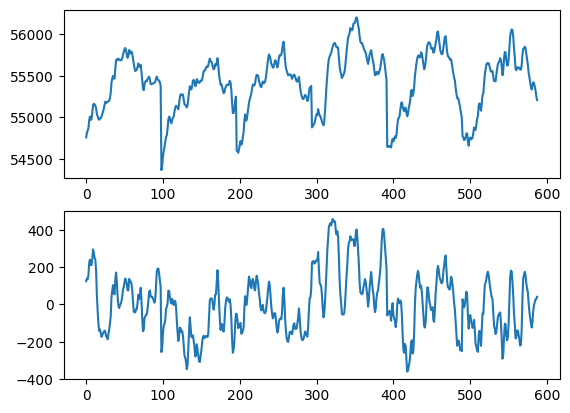

In [67]:
# year 1995-2000 compared between normal data and de-seasonalized data

year_start = datetime(year=1995, month=1, day=1)
year_end = datetime(year=2000, month=12, day=31)

date_mask = (time >= year_start) & (time <= year_end)

plt.subplot(2, 1, 1)
plt.plot(np.mean(zg[date_mask], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.plot(np.mean(zg_mean[date_mask], axis=(1, 2)))

plt.show()

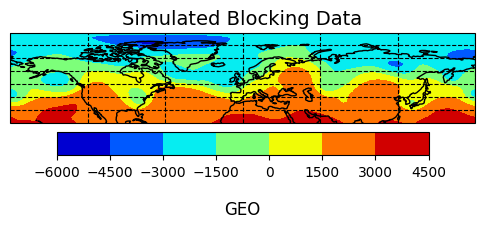

In [62]:
# plot observational data onto worldmap

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

plt.contourf(long[:], lat[:], zg_mean[0], transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Simulated Blocking Data', size=14)
cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('GEO',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

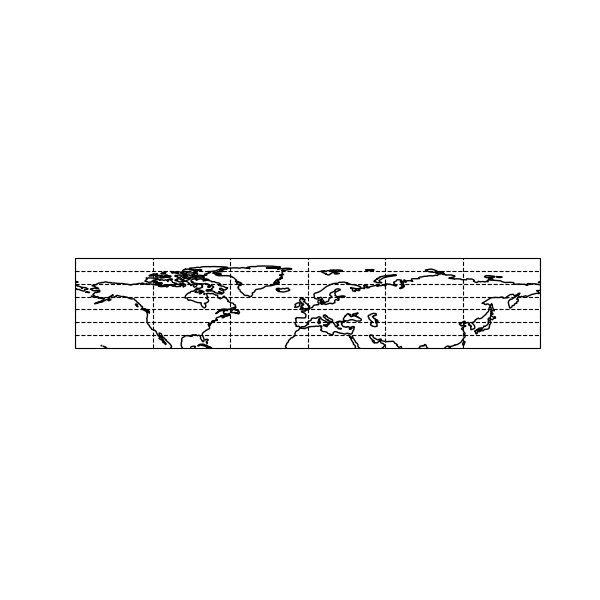

: 

In [4]:
# Set the figure size, projection, and extent
from matplotlib import animation

def update(frame):
    ax.clear()
    ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="110m",linewidth=1)
    ax.gridlines(linestyle='--',color='black')
    d = ground_truth_data.variables['z_0001'][frame]
    plt.title("Frame: " + str(frame))
    plt.contourf(long, lat, d, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

# plt.title('Simulated Blocking Data', size=14)
# cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
# cb.set_label('GEO',size=12,rotation=0,labelpad=15)
# cb.ax.tick_params(labelsize=10)

an = animation.FuncAnimation(fig, update, frames=len(ground_truth_data.variables["time"]), interval=1200)
plt.show()
